# Calibration using Zhang's procedure

In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
import cv2 # OpenCV
from calibration import Calibrator

## 1. Calibrate using Zhang procedure, i.e., find the intrinsic parameters K and, for each image, the pair of R, t (extrinsic);

In [2]:
calibrator = Calibrator((9,6), 24/1000)

folderpath = './phone_images2'
images_path = [os.path.join(folderpath, imagename) for imagename in os.listdir(folderpath) if imagename.endswith(".JPG")]
images_path.sort()
limages = []

for path in images_path:
    image = cv2.imread(path)
    limages.append(image)

calibrator.fit(limages, radial_distortion=False, iterative=False)
print("K:",calibrator.K)
print("Rotation matrices:")
for i,R in enumerate(calibrator.rotations):
   print(f"R{i+1}:{R}")
print("Translation vectors:")
for i,t in enumerate(calibrator.translations):
    print(f"t{i+1}:{t}")
print(calibrator.projection_matrices[7])

K: [[1.42060746e+03 2.73222896e+01 4.93546898e+02]
 [0.00000000e+00 1.39262449e+03 7.61594337e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Rotation matrices:
R1:[[ 0.68341225  0.72809905 -0.05309865]
 [ 0.68012079 -0.66143364 -0.31613486]
 [-0.26529872  0.17993694 -0.94722715]]
R2:[[-0.83119351 -0.1343638   0.53950322]
 [-0.06244019  0.98677928  0.14955895]
 [-0.55246591  0.09062574 -0.82859423]]
R3:[[-0.77106     0.63318039  0.06744674]
 [ 0.53596392  0.70254289 -0.46816254]
 [-0.34381557 -0.32483239 -0.88106457]]
R4:[[ 0.56456457  0.41305229 -0.71460105]
 [ 0.50234942 -0.85891044 -0.09958877]
 [-0.65491367 -0.30275513 -0.69240697]]
R5:[[ 0.85977531 -0.12108554  0.49610957]
 [-0.14498365 -0.98938569  0.00978224]
 [ 0.48965922 -0.08033831 -0.86820482]]
R6:[[-0.82774264  0.0361793  -0.55994034]
 [ 0.00888359  0.99863902  0.05139251]
 [ 0.56103762  0.03756549 -0.8269375 ]]
R7:[[-0.43281616 -0.60698412 -0.66651366]
 [-0.55631556  0.76161923 -0.3323389 ]
 [ 0.70935405  0.22695027 

## 2. Choose one of the calibration images and compute the total reprojection error for all the grid points (adding a figure with the reprojected points);
We will perform the procedure on the 8-th image, first with the basic procedure then with the iterative one
### Basic procedure

[np.float64(547.8604916263998), np.float64(3591.5495775823474), np.float64(538.5864019599819), np.float64(2898.753967227021), np.float64(9116.537199609027), np.float64(5685.725554662011), np.float64(8534.751707208337), np.float64(3902.154131810685), np.float64(1590.6002910299487), np.float64(2329.8403422833117), np.float64(7380.370882635819), np.float64(646.4598615161033), np.float64(888.3914718068278), np.float64(2453.463605544966), np.float64(1374.4987166165888), np.float64(706.4279649538569), np.float64(1657.1787274204396), np.float64(4907.006148298767), np.float64(2213.842303220108), np.float64(300.02494502277204)]


Text(0.5, 1.0, 'Total reprojection error: 3902.154131810685')

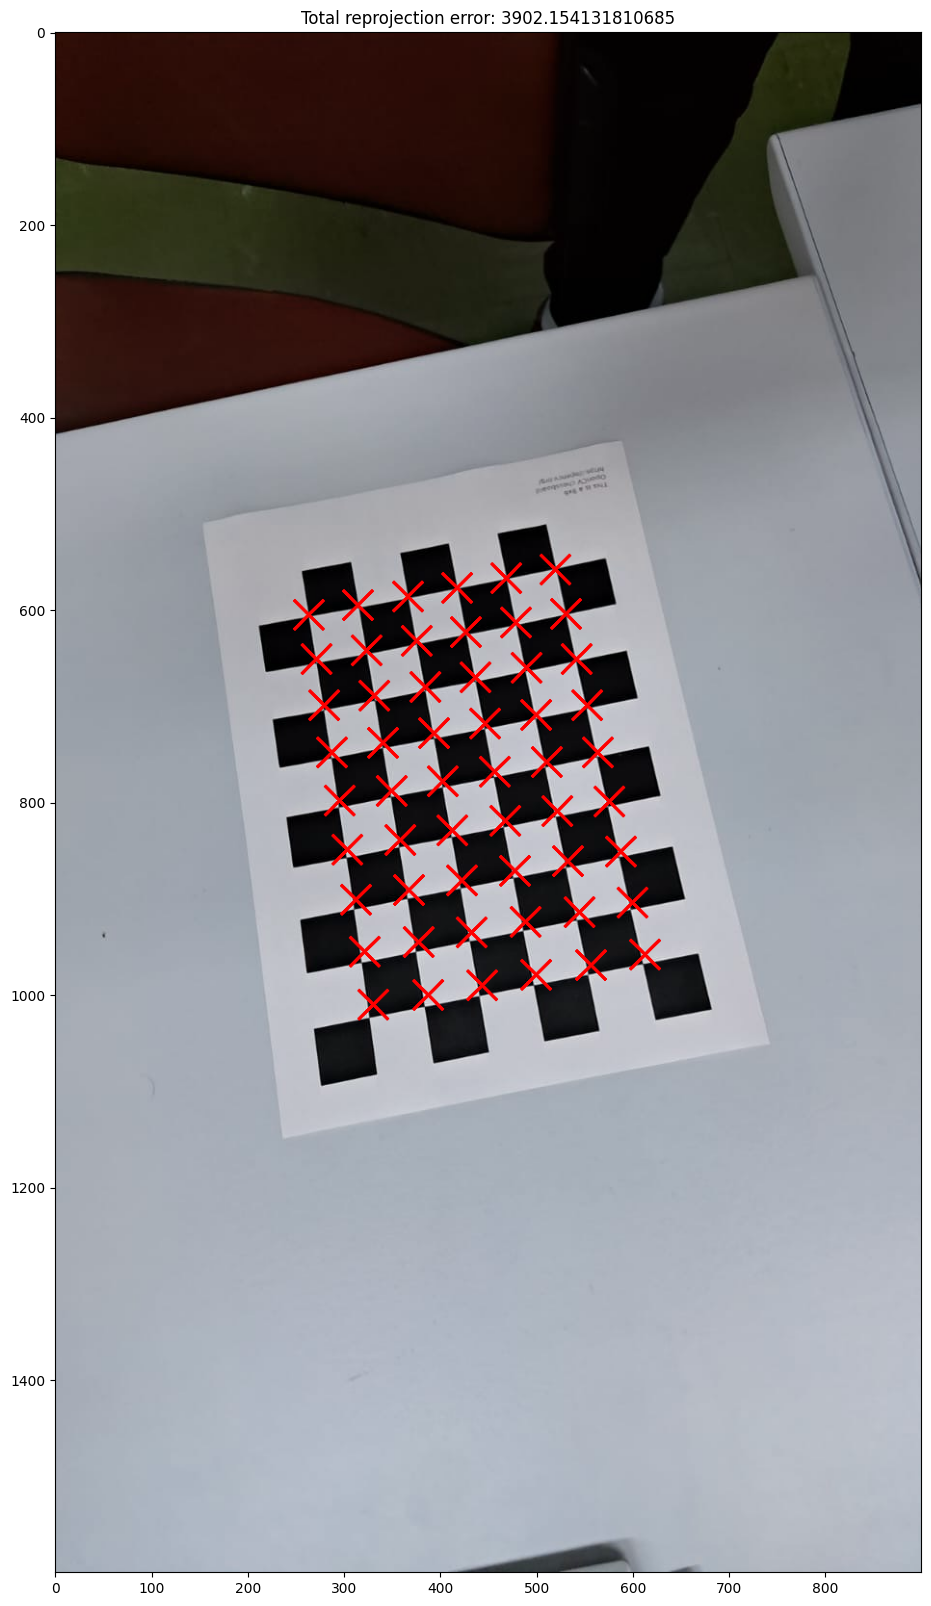

In [3]:
calibrator.fit(limages, radial_distortion=False, iterative=False)
print(calibrator.reprojection_errors)
index = 7
R, P, error = calibrator.real_coords, calibrator.projection_matrices[index], calibrator.reprojection_errors[index]
image7 = cv2.imread(images_path[index])
proj_chess = np.transpose(P@R.T)
proj_chess[:,0] = proj_chess[:,0]/proj_chess[:,2]
proj_chess[:,1] = proj_chess[:,1]/proj_chess[:,2]
proj_chess = proj_chess[:,:-1]
copy1 = image7.copy()
for point in proj_chess:
    copy1 = cv2.drawMarker(img=copy1,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(255,0,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=2,
                           markerSize=30
                           )
noi_nor = calibrator.reprojection_errors
plt.figure(figsize=(20,20))
plt.imshow(copy1)
plt.title(f"Total reprojection error: {error}")

### Iterative refinement

[np.float64(41.62827517922887), np.float64(63.89762356579861), np.float64(84.83939543507434), np.float64(62.92165315640545), np.float64(153.14348659044984), np.float64(46.96647336077166), np.float64(42.87919023345085), np.float64(65.3619367663189), np.float64(77.9433124310992), np.float64(61.2441794417492), np.float64(93.79163662043305), np.float64(72.36914621160061), np.float64(74.25916133704689), np.float64(62.022663922539124), np.float64(71.64699476963094), np.float64(83.33966630893248), np.float64(57.09173715578582), np.float64(36.571149853352416), np.float64(113.40165524640929), np.float64(74.05163799895446)]
[[-1.31830127e+03  1.11522289e+02 -5.55757901e+02  3.21594051e+02]
 [ 2.72359074e+02  1.03877219e+03 -1.10244121e+03  3.44796922e+02]
 [ 2.21494532e-02 -2.90226545e-01 -9.56701602e-01  6.17920704e-01]]


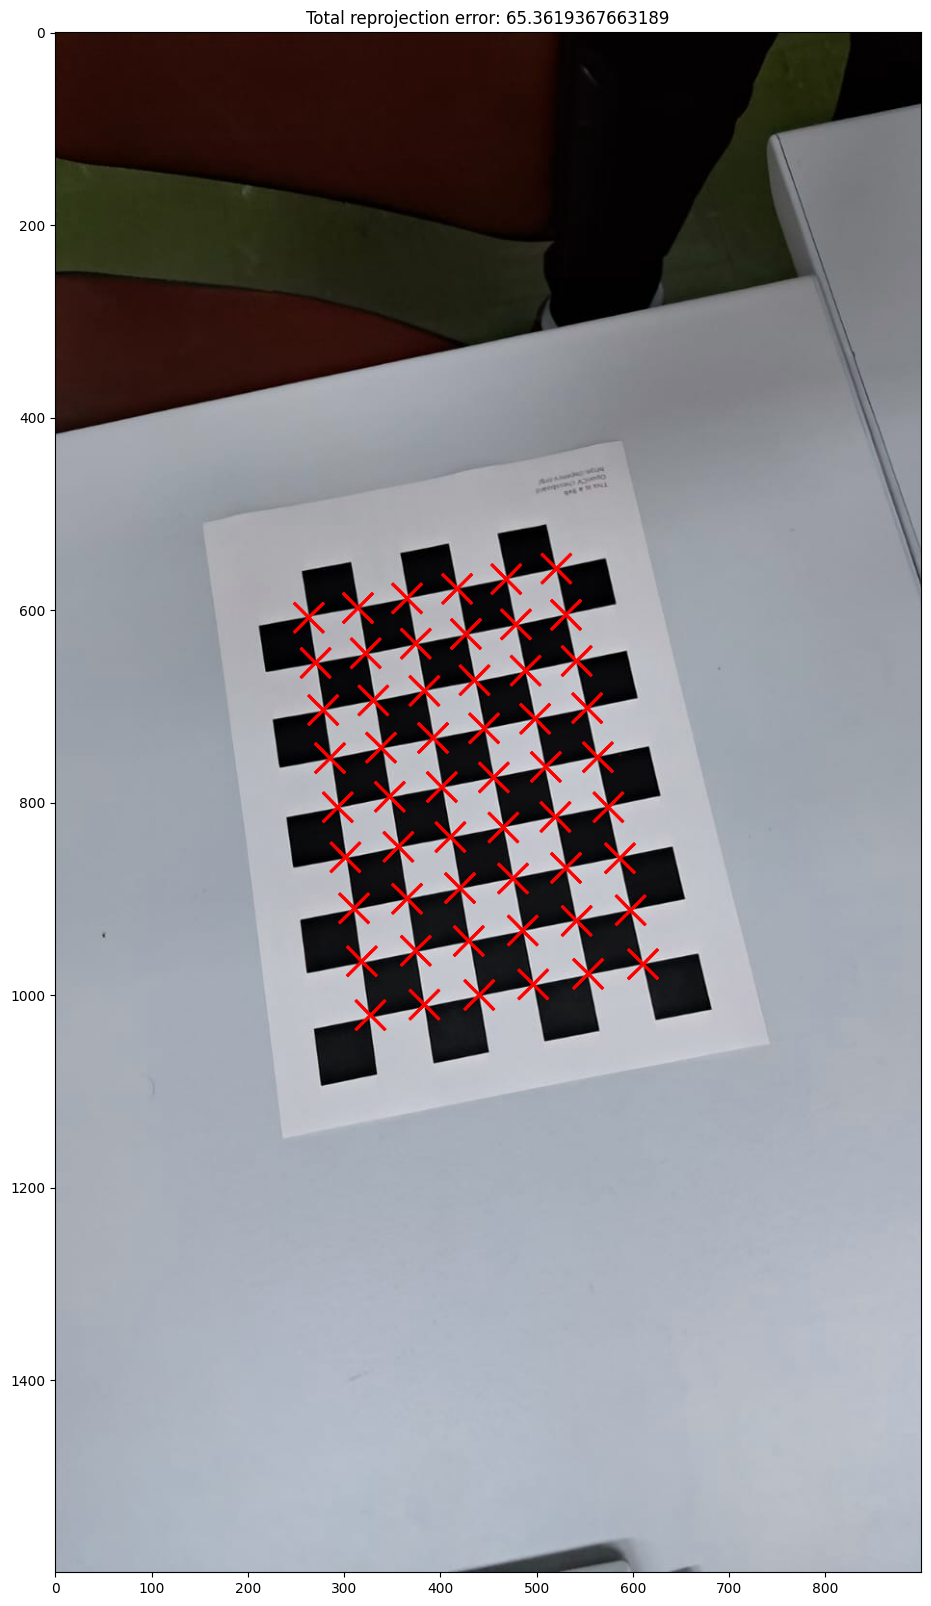

In [4]:
calibrator.fit(limages, radial_distortion=False, iterative=True)
print(calibrator.reprojection_errors)
index = 7
R, P, error = calibrator.real_coords, calibrator.projection_matrices[index], calibrator.reprojection_errors[index]
image7 = cv2.imread(images_path[index])
proj_chess = np.transpose(P@R.T)
proj_chess[:,0] = proj_chess[:,0]/proj_chess[:,2]
proj_chess[:,1] = proj_chess[:,1]/proj_chess[:,2]
proj_chess = proj_chess[:,:-1]
copy1 = image7.copy()
for point in proj_chess:
    copy1 = cv2.drawMarker(img=copy1,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(255,0,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=2,
                           markerSize=30
                           )
i_nor = calibrator.reprojection_errors
plt.figure(figsize=(20,20))
plt.imshow(copy1)
plt.title(f"Total reprojection error: {error}")
print(calibrator.projection_matrices[7])

## 3. Superimpose an object (for instance, a cylinder), to the calibration plane, in all the images employed for the calibration;

In [5]:
# Funzione generata con Microsoft Copilot
def create_image_grid(image_list, grid_size, is_bw=False):
    rows, cols = grid_size
    if len(image_list) != rows * cols:
        raise ValueError("Il numero di immagini non corrisponde alla dimensione della griglia")

    img_height, img_width = image_list[0].shape[:2]

    if not is_bw:
        grid_image = np.zeros((rows * img_height, cols * img_width, 3), dtype=np.uint8)
    else:
        grid_image = np.zeros((rows * img_height, cols * img_width), dtype=np.uint8)

    for idx, img in enumerate(image_list):
        row = idx // cols
        col = idx % cols
        grid_image[row * img_height:(row + 1) * img_height, col * img_width:(col + 1) * img_width] = img

    return grid_image

In [6]:
pts = cv2.ellipse2Poly((96,120), (48,48), 0, 0, 360, 1)
pts = pts/1000
et_low = np.empty_like(pts)
et_high = np.empty_like(et_low)
pts_low = np.hstack((pts, np.zeros((pts.shape[0],1)), np.ones((pts.shape[0],1))))
pts_high = np.hstack((pts, np.full((pts.shape[0],1), 0.120), np.ones((pts.shape[0],1))))

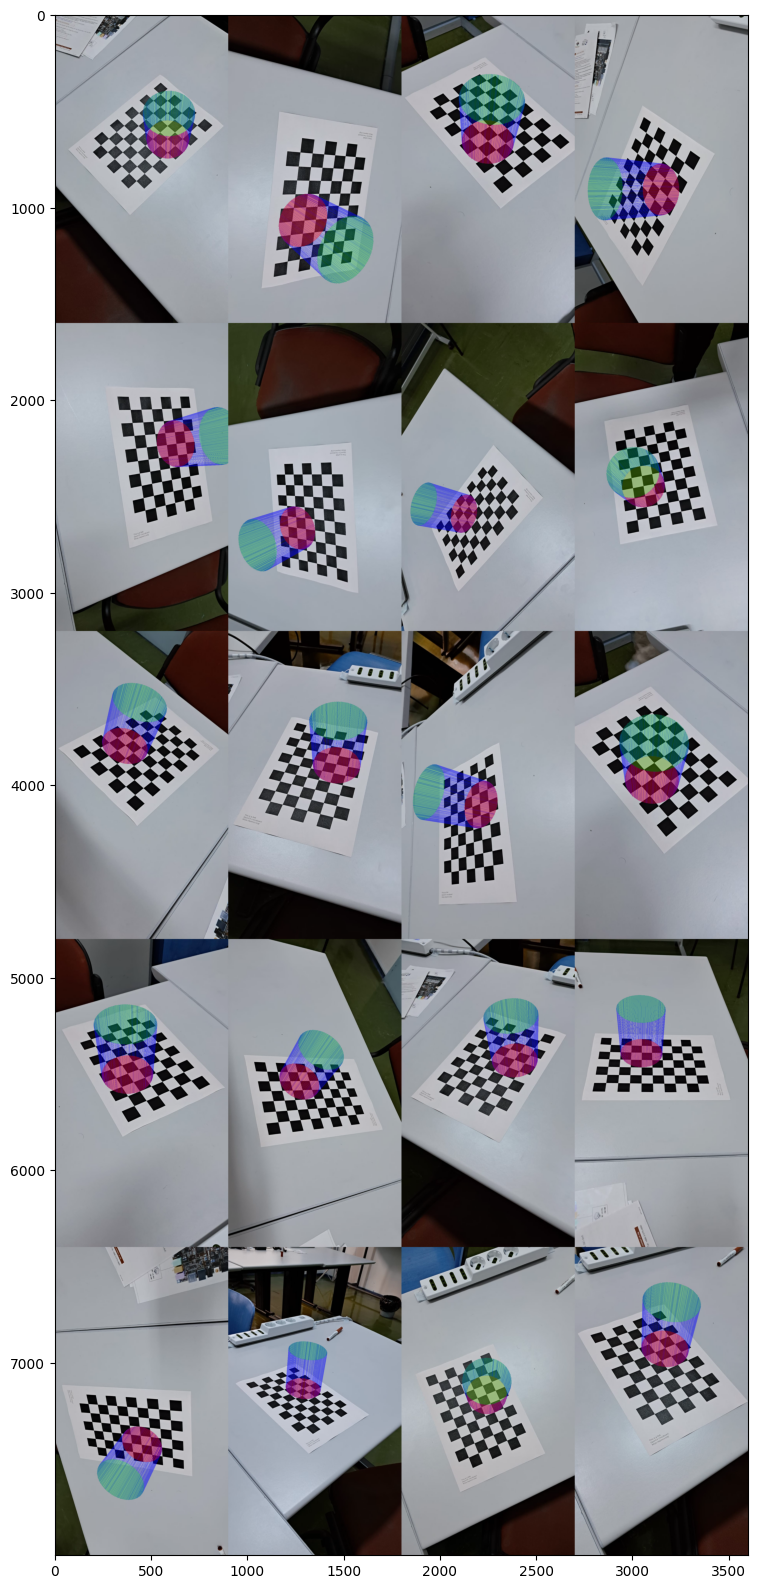

In [7]:
image_list = []
for i,path in enumerate(images_path):
    original = cv2.imread(path)
    P = calibrator.projection_matrices[i]

    proj_low = np.transpose(P @ pts_low.T)
    et_low[:,0] = proj_low[:,0]/proj_low[:,2]
    et_low[:,1] = proj_low[:,1]/proj_low[:,2]

    proj_high = np.transpose(P @ pts_high.T)
    et_high[:,0] = proj_high[:,0]/proj_high[:,2]
    et_high[:,1] = proj_high[:,1]/proj_high[:,2]

    img2 = original.copy()
    img2 = cv2.fillConvexPoly(img2,np.array(et_low, dtype=np.int32),(255,0,0))
    img3 = cv2.fillConvexPoly(img2.copy(),np.array(et_high, dtype=np.int32),(0,255,0))
    img4 = original.copy()
    for i in range(et_low.shape[0]):
        img4 = cv2.line(img4, tuple(np.array(et_low[i], dtype=np.int32)), tuple(np.array(et_high[i], dtype=np.int32)),(0,0,255))
    img2 = cv2.addWeighted(img2, 0.5, original, 0.5, 0)
    img3 = cv2.addWeighted(img2, 0.5, img3, 0.5, 0)
    img4 = cv2.addWeighted(img3, 0.5, img4, 0.5, 0)
    image_list.append(img4)

compound = create_image_grid(image_list, (5,4))
plt.figure(figsize=(20,20))
plt.imshow(compound)

[np.float64(16.92606586368615), np.float64(25.61484417978873), np.float64(19.013316374998137), np.float64(27.41349925095716), np.float64(35.31886400046134), np.float64(21.76995348309015), np.float64(33.08686193300574), np.float64(8.059227158030188), np.float64(26.50891097848426), np.float64(27.3800627701289), np.float64(23.111986456244193), np.float64(14.8370443243172), np.float64(26.018492968999812), np.float64(63.22994810893127), np.float64(21.493068002615566), np.float64(30.560826711082317), np.float64(33.35410613432975), np.float64(28.641012307406974), np.float64(18.941067621543464), np.float64(28.501299762693716)]
[[198 192 176 ... 254 254 254]
 [205 199 185 ... 254 254 254]
 [213 208 195 ... 254 254 254]
 ...
 [ 49  51  63 ...   0 255 254]
 [ 57  69  80 ... 255 254 252]
 [ 78  89 105 ... 254 253 251]] 0 255


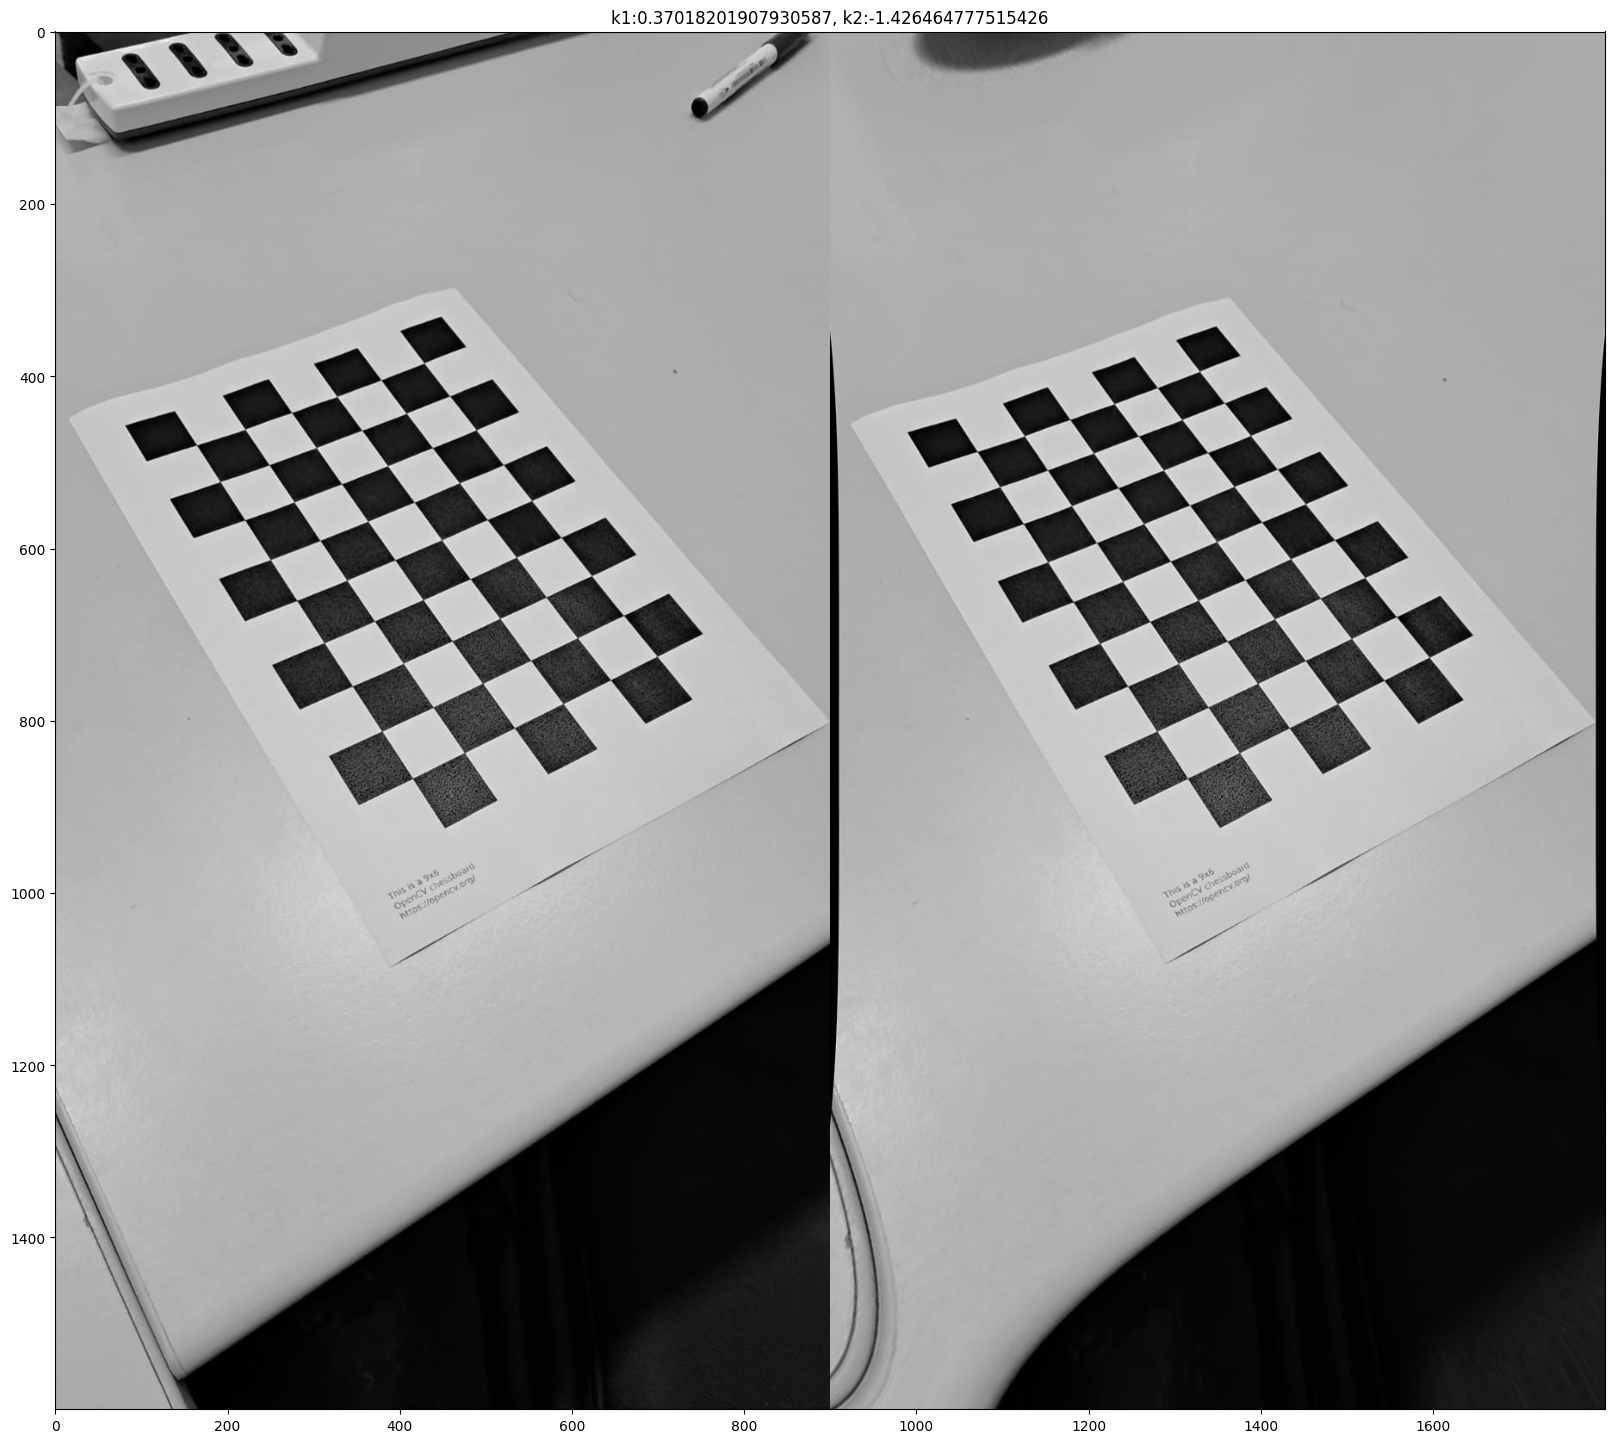

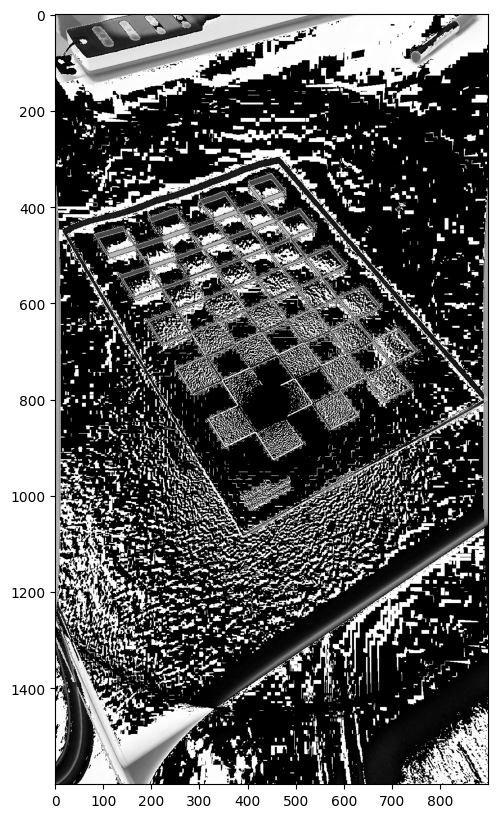

In [8]:
calibrator.fit(limages, radial_distortion=True, iterative=True)
print(calibrator.reprojection_errors)
index = 19
image7 = cv2.imread(images_path[index])
image7 = cv2.cvtColor(image7.copy(), cv2.COLOR_BGR2GRAY)
undistorted7 = calibrator.compensate_radial_distortion(image7)
limage1 = [image7, undistorted7]
compound = create_image_grid(limage1, (1,2), True)
diff = image7 - undistorted7
ir = calibrator.reprojection_errors
print(diff, np.min(diff), np.max(diff))
plt.figure(figsize=(20,20))
plt.imshow(compound, cmap='gray')
plt.title(f"k1:{calibrator.distortion_parameters[0]}, k2:{calibrator.distortion_parameters[1]}")

plt.figure(figsize=(10,10))
plt.imshow(diff, cmap='gray')

[np.float64(16.92606586368615), np.float64(25.61484417978873), np.float64(19.013316374998137), np.float64(27.41349925095716), np.float64(35.31886400046134), np.float64(21.76995348309015), np.float64(33.08686193300574), np.float64(8.059227158030188), np.float64(26.50891097848426), np.float64(27.3800627701289), np.float64(23.111986456244193), np.float64(14.8370443243172), np.float64(26.018492968999812), np.float64(63.22994810893127), np.float64(21.493068002615566), np.float64(30.560826711082317), np.float64(33.35410613432975), np.float64(28.641012307406974), np.float64(18.941067621543464), np.float64(28.501299762693716)]
[np.float64(547.8604916263998), np.float64(3591.5495775823474), np.float64(538.5864019599819), np.float64(2898.753967227021), np.float64(9116.537199609027), np.float64(5685.725554662011), np.float64(8534.751707208337), np.float64(3902.154131810685), np.float64(1590.6002910299487), np.float64(2329.8403422833117), np.float64(7380.370882635819), np.float64(646.4598615161033

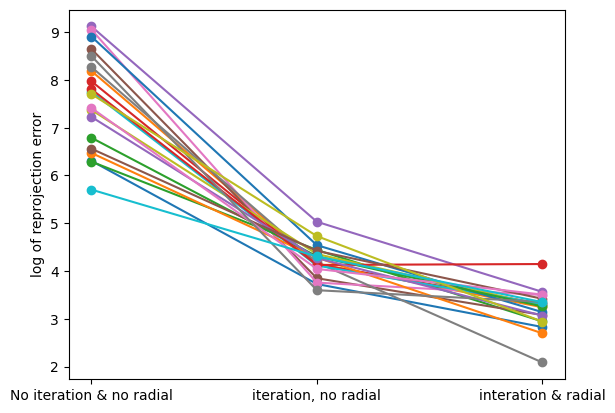

In [9]:
print(ir)
print(noi_nor)
print(i_nor)

for i in range(len(ir)):
    plt.plot([0, 1, 2], [np.log(noi_nor[i]), np.log(i_nor[i]), np.log(ir[i])], 'o-')
    plt.xticks(ticks=[0, 1, 2], labels=['No iteration & no radial', 'iteration, no radial', 'interation & radial'])
    plt.ylabel('log of reprojection error')